## Get All Functions from All Phases and Groups

In [1]:
import pandas as pd
import numpy as np
import math
import collections
import matplotlib.pyplot as plt

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5


%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase3_bogota0
%store -r subset_bogota0_phase4
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota0_phase5
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase3_bogota1
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota1_phase5
%store -r subset_bogota1_phase4
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase3_bogota2
%store -r overall_phase4_bogota2
%store -r overall_phase5_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase3_bogota3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3
%store -r subset_bogota2_phase4

%store -r overall_phase2_bogota0
%store -r overall_phase2_bogota1
%store -r overall_phase2_bogota2
%store -r overall_phase2_bogota3

%store -r overall_phase1_bogota0
%store -r overall_phase1_bogota1
%store -r overall_phase1_bogota2
%store -r overall_phase1_bogota3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
## List the 20,000 least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
new_list = overall_45['functions'].explode().to_list()
new_list = list(filter(None, new_list))
new_list

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/3237658141.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/3237658141.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_23 = overall_12.append(overall_phase3, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/3237658141.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_34 = overall_23.append(overall_phase4, ignore_index=True)
/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/3237658141.py:6: FutureWarning: The frame.append method is deprecated and will be remo

['.ready',
 '.click',
 '.mcheck',
 '.on',
 '.closest',
 '.list',
 '.find',
 '.form',
 '.toggleClass',
 '.val',
 'document.getElementById',
 'google.maps.Map',
 '.getJSON',
 'test.json',
 'bootstrap.min.css',
 'theme.min.css',
 'jquery.min.js',
 'bootstrap.min.js',
 'js.js',
 'jsondata.js',
 'css.css',
 'style.css',
 'map.js',
 'document.getElementById',
 'google.maps.Map',
 'google.maps.Marker',
 nan,
 nan,
 nan,
 'bootstrap.min.css',
 'style.css',
 '.JS',
 '.js',
 nan,
 nan,
 'jquery.min.js',
 '.js',
 'Rent.js',
 'Crimes.js',
 'google.maps.Map',
 'document.getElementById',
 '.ajax',
 'data.cityofchicago.org',
 'xi.json',
 '.done',
 'data.length',
 'google.maps.Marker',
 'google.maps.LatLng',
 '.latitude',
 '.longitude',
 '.primary',
 'crimeMarker.push',
 'crimeMarker.length',
 '.setMap',
 'google.maps.InfoWindow',
 'google.maps.event.addListener',
 'infowindow.close',
 'infowindow.setContent',
 'data.primary',
 'infowindow.open',
 'marker.get',
 '.innerHTML',
 'data.id',
 'data.date',

In [4]:
str1_nan = [x for x in new_list if str(x) != 'nan']
str1 = set(str1_nan)
print(sorted(str1))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
global_functions = {'Student': 'all', 'functions': [str1_nan], 'unique': [str1], 'len_unique': len(str1), 'phase': 0}
global_functions = pd.DataFrame(data=global_functions)
global_functions

,Student,functions,unique,len_unique,phase
0,all,"[.ready, .click, .mcheck, .on, .closest, .list...","{meta.element, .Messages.StrictDelete, .geoloc...",207479,0


## Append Global Functions with Bogota 0 Phase 5

In [6]:
subset_bogota0_phase5_all = overall_phase5_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase5_all = subset_bogota0_phase5_all[subset_bogota0_phase5_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/982611744.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase5_all = overall_phase5_bogota0.append(global_functions, ignore_index=True)


In [7]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase5_all["unique"], subset_bogota0_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase5_compare_all = pd.DataFrame(result)
subset_bogota0_phase5_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.013866
1,fffeelipe,jmcuestasb,0.005189
2,fffeelipe,katherinsb,0.009228
3,fffeelipe,jjrodriguezn,0.035211
4,fffeelipe,DglyP,0.012088
...,...,...,...
401,lfvalderrama,gabi04,0.119048
402,lfvalderrama,all,0.000299
403,bsgarciac,gabi04,0.105263
404,bsgarciac,all,0.000631


In [8]:
subset_bogota0_phase5_all_only = subset_bogota0_phase5_compare_all.loc[subset_bogota0_phase5_compare_all['user2'] == 'all']
subset_bogota0_phase5_all_only

,user1,user2,similarity
27,fffeelipe,all,0.000559
54,mnguzmanc,all,0.011071
80,jmcuestasb,all,0.033984
105,katherinsb,all,0.011037
129,jjrodriguezn,all,0.000149
152,DglyP,all,0.011143
174,Judgarciani,all,0.001012
195,sacastroc,all,0.000386
215,pcberriop,all,0.000434
234,hsmartineza,all,0.000318


## Append Global Functions with Bogota 0 Phase 4

In [9]:
subset_bogota0_phase4_all = overall_phase4_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase4_all = subset_bogota0_phase4_all[subset_bogota0_phase4_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2438821191.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase4_all = overall_phase4_bogota0.append(global_functions, ignore_index=True)


In [10]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase4_all["unique"], subset_bogota0_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase4_compare_all = pd.DataFrame(result)
subset_bogota0_phase4_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.013108
1,fffeelipe,jmcuestasb,0.004914
2,fffeelipe,katherinsb,0.024194
3,fffeelipe,jjrodriguezn,0.038760
4,fffeelipe,DglyP,0.010620
...,...,...,...
401,lfvalderrama,gabi04,0.111111
402,lfvalderrama,all,0.000299
403,bsgarciac,gabi04,0.086705
404,bsgarciac,all,0.000627


In [11]:
subset_bogota0_phase4_all_only = subset_bogota0_phase4_compare_all.loc[subset_bogota0_phase4_compare_all['user2'] == 'all']
subset_bogota0_phase4_all_only

,user1,user2,similarity
27,fffeelipe,all,0.000511
54,mnguzmanc,all,0.011037
80,jmcuestasb,all,0.033984
105,katherinsb,all,0.000101
129,jjrodriguezn,all,0.000135
152,DglyP,all,0.013707
174,Judgarciani,all,0.000665
195,sacastroc,all,0.000390
215,pcberriop,all,0.000318
234,hsmartineza,all,0.000304


## Append Global Functions with Bogota 0 Phase 3

In [12]:
subset_bogota0_phase3_all = overall_phase3_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase3_all = subset_bogota0_phase3_all[subset_bogota0_phase3_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2316435347.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase3_all = overall_phase3_bogota0.append(global_functions, ignore_index=True)


In [13]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase3_all["unique"], subset_bogota0_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase3_compare_all = pd.DataFrame(result)
subset_bogota0_phase3_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.003923
1,fffeelipe,jmcuestasb,0.001839
2,fffeelipe,jjrodriguezn,0.096154
3,fffeelipe,DglyP,0.255814
4,fffeelipe,Judgarciani,0.058442
...,...,...,...
373,lfvalderrama,gabi04,0.103774
374,lfvalderrama,all,0.000284
375,bsgarciac,gabi04,0.097222
376,bsgarciac,all,0.000482


In [14]:
subset_bogota0_phase3_all_only = subset_bogota0_phase3_compare_all.loc[subset_bogota0_phase3_compare_all['user2'] == 'all']
subset_bogota0_phase3_all_only

,user1,user2,similarity
26,fffeelipe,all,0.000145
52,mnguzmanc,all,0.010955
77,jmcuestasb,all,0.033984
101,jjrodriguezn,all,0.000130
124,DglyP,all,0.000116
146,Judgarciani,all,0.000641
167,sacastroc,all,0.000347
187,pcberriop,all,0.000198
206,hsmartineza,all,0.000251
224,Moimolcp,all,0.000376


## Append Global Functions with Bogota 0 Phase 2

In [15]:
subset_bogota0_phase2_all = overall_phase2_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase2_all = subset_bogota0_phase2_all[subset_bogota0_phase2_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/201893000.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase2_all = overall_phase2_bogota0.append(global_functions, ignore_index=True)


In [16]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase2_all["unique"], subset_bogota0_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase2_compare_all = pd.DataFrame(result)
subset_bogota0_phase2_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.100000
1,fffeelipe,jmcuestasb,0.001839
2,fffeelipe,jjrodriguezn,0.195122
3,fffeelipe,DglyP,0.255814
4,fffeelipe,Judgarciani,0.078431
...,...,...,...
373,lfvalderrama,gabi04,0.125000
374,lfvalderrama,all,0.000193
375,bsgarciac,gabi04,0.122222
376,bsgarciac,all,0.000289


In [17]:
subset_bogota0_phase2_all_only = subset_bogota0_phase2_compare_all.loc[subset_bogota0_phase2_compare_all['user2'] == 'all']
subset_bogota0_phase2_all_only

,user1,user2,similarity
26,fffeelipe,all,0.000145
52,mnguzmanc,all,0.000120
77,jmcuestasb,all,0.033984
101,jjrodriguezn,all,0.000092
124,DglyP,all,0.000116
146,Judgarciani,all,0.000386
167,sacastroc,all,0.000202
187,pcberriop,all,0.000198
206,hsmartineza,all,0.000169
224,Moimolcp,all,0.000188


## Append Global Functions with Bogota 0 Phase 1

In [18]:
subset_bogota0_phase1_all = overall_phase1_bogota0.append(global_functions, ignore_index=True)
subset_bogota0_phase1_all = subset_bogota0_phase1_all[subset_bogota0_phase1_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2921713975.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota0_phase1_all = overall_phase1_bogota0.append(global_functions, ignore_index=True)


In [19]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase1_all["unique"], subset_bogota0_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase1_compare_all = pd.DataFrame(result)
subset_bogota0_phase1_compare_all

,user1,user2,similarity
0,fffeelipe,mnguzmanc,0.083333
1,fffeelipe,DglyP,0.041667
2,fffeelipe,Judgarciani,0.051724
3,fffeelipe,sacastroc,0.166667
4,fffeelipe,pcberriop,0.070175
...,...,...,...
271,capinillab,bsgarciac,0.121951
272,capinillab,all,0.000034
273,lfvalderrama,bsgarciac,0.079365
274,lfvalderrama,all,0.000140


In [20]:
subset_bogota0_phase1_all_only = subset_bogota0_phase1_compare_all.loc[subset_bogota0_phase1_compare_all['user2'] == 'all']
subset_bogota0_phase1_all_only

,user1,user2,similarity
22,fffeelipe,all,0.000101
44,mnguzmanc,all,0.000024
65,DglyP,all,0.000019
85,Judgarciani,all,0.000193
104,sacastroc,all,0.000034
122,pcberriop,all,0.000193
139,hsmartineza,all,0.000111
155,Moimolcp,all,0.000188
170,JoseMolano,all,0.000014
184,maikellPardoA,all,0.000019


## Append Global Functions with Bogota 1 Phase 5

In [21]:
subset_bogota1_phase5_all = overall_phase5_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase5_all = subset_bogota1_phase5_all[subset_bogota1_phase5_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/1085720083.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase5_all = overall_phase5_bogota1.append(global_functions, ignore_index=True)


In [22]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase5_all["unique"], subset_bogota1_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase5_compare_all = pd.DataFrame(result)
subset_bogota1_phase5_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.049180
1,gasierram,bdcajicam,0.515625
2,gasierram,dfhincapiem,0.065574
3,gasierram,helmeraac,0.091954
4,gasierram,dasalgadob,0.129032
...,...,...,...
625,jcrubioa,JairVillalba,0.088710
626,jcrubioa,all,0.001663
627,joahernandezca,JairVillalba,0.134969
628,joahernandezca,all,0.000602


In [23]:
subset_bogota1_phase5_all_only = subset_bogota1_phase5_compare_all.loc[subset_bogota1_phase5_compare_all['user2'] == 'all']
subset_bogota1_phase5_all_only

,user1,user2,similarity
34,gasierram,all,0.000294
68,adamantwharf,all,0.000014
101,bdcajicam,all,0.000174
133,dfhincapiem,all,0.000019
164,helmeraac,all,0.000164
194,dasalgadob,all,0.000043
223,falperezgo,all,0.009683
251,djguzmanc,all,0.000313
278,gsuarezc04,all,0.000198
304,oeroaq,all,0.012903


## Append Global Functions with Bogota 1 Phase 4

In [24]:
subset_bogota1_phase4_all = overall_phase4_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase4_all = subset_bogota1_phase4_all[subset_bogota1_phase4_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2899935288.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase4_all = overall_phase4_bogota1.append(global_functions, ignore_index=True)


In [25]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase4_all["unique"], subset_bogota1_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase4_compare_all = pd.DataFrame(result)
subset_bogota1_phase4_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.049180
1,gasierram,bdcajicam,0.515625
2,gasierram,dfhincapiem,0.065574
3,gasierram,helmeraac,0.091954
4,gasierram,dasalgadob,0.129032
...,...,...,...
661,jcrubioa,JairVillalba,0.076271
662,jcrubioa,all,0.001663
663,joahernandezca,JairVillalba,0.125874
664,joahernandezca,all,0.000602


In [26]:
subset_bogota1_phase4_all_only = subset_bogota1_phase4_compare_all.loc[subset_bogota1_phase4_compare_all['user2'] == 'all']
subset_bogota1_phase4_all_only

,user1,user2,similarity
35,gasierram,all,0.000294
70,adamantwharf,all,0.000014
104,bdcajicam,all,0.000174
137,dfhincapiem,all,0.000019
169,helmeraac,all,0.000164
200,dasalgadob,all,0.000043
230,falperezgo,all,0.009654
259,djguzmanc,all,0.000313
287,gsuarezc04,all,0.000198
314,oeroaq,all,0.014989


## Append Global Functions with Bogota 1 Phase 3

In [27]:
subset_bogota1_phase3_all = overall_phase3_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase3_all = subset_bogota1_phase3_all[subset_bogota1_phase3_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2795334516.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase3_all = overall_phase3_bogota1.append(global_functions, ignore_index=True)


In [28]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase3_all["unique"], subset_bogota1_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase3_compare_all = pd.DataFrame(result)
subset_bogota1_phase3_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.049180
1,gasierram,bdcajicam,0.515625
2,gasierram,dfhincapiem,0.065574
3,gasierram,helmeraac,0.070423
4,gasierram,dasalgadob,0.129032
...,...,...,...
661,jcrubioa,JairVillalba,0.070822
662,jcrubioa,all,0.001663
663,joahernandezca,JairVillalba,0.122302
664,joahernandezca,all,0.000593


In [29]:
subset_bogota1_phase3_all_only = subset_bogota1_phase3_compare_all.loc[subset_bogota1_phase3_compare_all['user2'] == 'all']
subset_bogota1_phase3_all_only

,user1,user2,similarity
35,gasierram,all,0.000294
70,adamantwharf,all,0.000014
104,bdcajicam,all,0.000174
137,dfhincapiem,all,0.000019
169,helmeraac,all,0.000072
200,dasalgadob,all,0.000043
230,falperezgo,all,0.009370
259,djguzmanc,all,0.000241
287,gsuarezc04,all,0.000198
314,oeroaq,all,0.003436


## Append Global Functions with Bogota 1 Phase 2

In [30]:
subset_bogota1_phase2_all = overall_phase2_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase2_all = subset_bogota1_phase2_all[subset_bogota1_phase2_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2918173664.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase2_all = overall_phase2_bogota1.append(global_functions, ignore_index=True)


In [31]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase2_all["unique"], subset_bogota1_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase2_compare_all = pd.DataFrame(result)
subset_bogota1_phase2_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.176471
1,gasierram,bdcajicam,0.176471
2,gasierram,dfhincapiem,0.235294
3,gasierram,helmeraac,0.142857
4,gasierram,dasalgadob,0.444444
...,...,...,...
661,jcrubioa,JairVillalba,0.054441
662,jcrubioa,all,0.001663
663,joahernandezca,JairVillalba,0.123077
664,joahernandezca,all,0.000593


In [32]:
subset_bogota1_phase2_all_only = subset_bogota1_phase2_compare_all.loc[subset_bogota1_phase2_compare_all['user2'] == 'all']
subset_bogota1_phase2_all_only

,user1,user2,similarity
35,gasierram,all,0.000082
70,adamantwharf,all,0.000014
104,bdcajicam,all,0.000014
137,dfhincapiem,all,0.000019
169,helmeraac,all,0.000072
200,dasalgadob,all,0.000043
230,falperezgo,all,0.009370
259,djguzmanc,all,0.000217
287,gsuarezc04,all,0.000198
314,oeroaq,all,0.000728


## Append Global Functions with Bogota 1 Phase 1

In [33]:
subset_bogota1_phase1_all = overall_phase1_bogota1.append(global_functions, ignore_index=True)
subset_bogota1_phase1_all = subset_bogota1_phase1_all[subset_bogota1_phase1_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2408262328.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota1_phase1_all = overall_phase1_bogota1.append(global_functions, ignore_index=True)


In [34]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase1_all["unique"], subset_bogota1_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase1_compare_all = pd.DataFrame(result)
subset_bogota1_phase1_compare_all

,user1,user2,similarity
0,gasierram,adamantwharf,0.176471
1,gasierram,bdcajicam,0.176471
2,gasierram,helmeraac,0.150000
3,gasierram,dasalgadob,0.444444
4,gasierram,falperezgo,0.151515
...,...,...,...
523,jcrubioa,JairVillalba,0.008902
524,jcrubioa,all,0.001619
525,joahernandezca,JairVillalba,0.750000
526,joahernandezca,all,0.000014


In [35]:
subset_bogota1_phase1_all_only = subset_bogota1_phase1_compare_all.loc[subset_bogota1_phase1_compare_all['user2'] == 'all']
subset_bogota1_phase1_all_only

,user1,user2,similarity
31,gasierram,all,0.000082
62,adamantwharf,all,0.000014
92,bdcajicam,all,0.000014
121,helmeraac,all,0.000029
149,dasalgadob,all,0.000043
176,falperezgo,all,0.000101
202,djguzmanc,all,0.000164
227,oeroaq,all,0.000559
251,gcantem,all,0.000545
274,Semoralesga,all,0.000024


## Append Global Functions with Bogota 2 Phase 5

In [36]:
subset_bogota2_phase5_all = overall_phase5_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase5_all = subset_bogota2_phase5_all[subset_bogota2_phase5_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/445602927.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase5_all = overall_phase5_bogota2.append(global_functions, ignore_index=True)


In [37]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase5_all["unique"], subset_bogota2_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase5_compare_all = pd.DataFrame(result)
subset_bogota2_phase5_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003091
1,jusherrerama,Phoenixest,0.001326
2,jusherrerama,HashNick,0.005635
3,jusherrerama,ccvacad,0.004275
4,jusherrerama,joaortizro,0.002639
...,...,...,...
736,lsfinite,jscontrerasp,0.002871
737,lsfinite,all,0.023434
738,xdanielsb,jscontrerasp,0.020790
739,xdanielsb,all,0.002232


In [38]:
subset_bogota2_phase5_all_only = subset_bogota2_phase5_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase5_all_only

,user1,user2,similarity
37,jusherrerama,all,0.010897
74,bdvegat,all,0.000053
110,Phoenixest,all,0.000024
145,HashNick,all,0.000284
179,ccvacad,all,0.000424
212,joaortizro,all,0.000092
244,juasmartinezbel,all,0.000978
275,mdbelloc,all,0.000255
305,diegocruz10,all,0.000193
334,sagilm,all,0.000174


## Append Global Functions with Bogota 2 Phase 4

In [39]:
subset_bogota2_phase4_all = overall_phase4_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase4_all = subset_bogota2_phase4_all[subset_bogota2_phase4_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/170998639.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase4_all = overall_phase4_bogota2.append(global_functions, ignore_index=True)


In [40]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase4_all["unique"], subset_bogota2_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase4_compare_all = pd.DataFrame(result)
subset_bogota2_phase4_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003091
1,jusherrerama,Phoenixest,0.001326
2,jusherrerama,HashNick,0.005635
3,jusherrerama,ccvacad,0.003871
4,jusherrerama,joaortizro,0.002639
...,...,...,...
736,lsfinite,jscontrerasp,0.002871
737,lsfinite,all,0.023434
738,xdanielsb,jscontrerasp,0.028000
739,xdanielsb,all,0.001104


In [41]:
subset_bogota2_phase4_all_only = subset_bogota2_phase4_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase4_all_only

,user1,user2,similarity
37,jusherrerama,all,0.010897
74,bdvegat,all,0.000053
110,Phoenixest,all,0.000024
145,HashNick,all,0.000284
179,ccvacad,all,0.000352
212,joaortizro,all,0.000092
244,juasmartinezbel,all,0.000978
275,mdbelloc,all,0.000255
305,diegocruz10,all,0.000193
334,sagilm,all,0.000101


## Append Global Functions with Bogota 2 Phase 3

In [42]:
subset_bogota2_phase3_all = overall_phase3_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase3_all = subset_bogota2_phase3_all[subset_bogota2_phase3_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2811566809.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase3_all = overall_phase3_bogota2.append(global_functions, ignore_index=True)


In [43]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase3_all["unique"], subset_bogota2_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase3_compare_all = pd.DataFrame(result)
subset_bogota2_phase3_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.003091
1,jusherrerama,Phoenixest,0.001326
2,jusherrerama,HashNick,0.004340
3,jusherrerama,joaortizro,0.002639
4,jusherrerama,juasmartinezbel,0.004601
...,...,...,...
698,lsfinite,jscontrerasp,0.003078
699,lsfinite,all,0.023424
700,xdanielsb,jscontrerasp,0.032710
701,xdanielsb,all,0.000930


In [44]:
subset_bogota2_phase3_all_only = subset_bogota2_phase3_compare_all.loc[subset_bogota2_phase3_compare_all['user2'] == 'all']
subset_bogota2_phase3_all_only

,user1,user2,similarity
36,jusherrerama,all,0.010897
72,bdvegat,all,0.000053
107,Phoenixest,all,0.000024
141,HashNick,all,0.000255
174,joaortizro,all,0.000092
206,juasmartinezbel,all,0.000680
237,mdbelloc,all,0.000255
267,diegocruz10,all,0.000193
296,sagilm,all,0.000101
324,idrojasf,all,0.002868


## Append Global Functions with Bogota 2 Phase 2

In [45]:
subset_bogota2_phase2_all = overall_phase2_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase2_all = subset_bogota2_phase2_all[subset_bogota2_phase2_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/3406255367.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase2_all = overall_phase2_bogota2.append(global_functions, ignore_index=True)


In [46]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase2_all["unique"], subset_bogota2_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase2_compare_all = pd.DataFrame(result)
subset_bogota2_phase2_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.176471
1,jusherrerama,Phoenixest,0.166667
2,jusherrerama,HashNick,0.045455
3,jusherrerama,joaortizro,0.173913
4,jusherrerama,juasmartinezbel,0.035088
...,...,...,...
698,lsfinite,jscontrerasp,0.002060
699,lsfinite,all,0.023337
700,xdanielsb,jscontrerasp,0.029851
701,xdanielsb,all,0.000892


In [47]:
subset_bogota2_phase2_all_only = subset_bogota2_phase2_compare_all.loc[subset_bogota2_phase2_compare_all['user2'] == 'all']
subset_bogota2_phase2_all_only

,user1,user2,similarity
36,jusherrerama,all,0.000077
72,bdvegat,all,0.000019
107,Phoenixest,all,0.000024
141,HashNick,all,0.000255
174,joaortizro,all,0.000053
206,juasmartinezbel,all,0.000492
237,mdbelloc,all,0.000255
267,diegocruz10,all,0.000130
296,sagilm,all,0.000024
324,idrojasf,all,0.002868


## Append Global Functions with Bogota 2 Phase 1

In [48]:
subset_bogota2_phase1_all = overall_phase1_bogota2.append(global_functions, ignore_index=True)
subset_bogota2_phase1_all = subset_bogota2_phase1_all[subset_bogota2_phase1_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2374555308.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota2_phase1_all = overall_phase1_bogota2.append(global_functions, ignore_index=True)


In [49]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase1_all["unique"], subset_bogota2_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase1_compare_all = pd.DataFrame(result)
subset_bogota2_phase1_compare_all

,user1,user2,similarity
0,jusherrerama,bdvegat,0.176471
1,jusherrerama,Phoenixest,0.166667
2,jusherrerama,HashNick,0.041667
3,jusherrerama,joaortizro,0.040000
4,jusherrerama,juasmartinezbel,0.038835
...,...,...,...
661,lsfinite,jscontrerasp,0.166667
662,lsfinite,all,0.000043
663,xdanielsb,jscontrerasp,0.017964
664,xdanielsb,all,0.000795


In [50]:
subset_bogota2_phase1_all_only = subset_bogota2_phase1_compare_all.loc[subset_bogota2_phase1_compare_all['user2'] == 'all']
subset_bogota2_phase1_all_only

,user1,user2,similarity
35,jusherrerama,all,0.000077
70,bdvegat,all,0.000019
104,Phoenixest,all,0.000024
137,HashNick,all,0.000284
169,joaortizro,all,0.000048
200,juasmartinezbel,all,0.000439
230,mdbelloc,all,0.000255
259,diegocruz10,all,0.000125
287,sagilm,all,0.000014
314,idrojasf,all,0.002868


## Append Global Functions with Bogota 3 Phase 5

In [51]:
subset_bogota3_phase5_all = overall_phase5_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase5_all = subset_bogota3_phase5_all[subset_bogota3_phase5_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/21929757.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota3_phase5_all = overall_phase5_bogota3.append(global_functions, ignore_index=True)


In [52]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase5_all["unique"], subset_bogota3_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase5_bogota3_compare_all = pd.DataFrame(result)
overall_phase5_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.005428
1,lemartinp,nfmorenog,0.164179
2,lemartinp,AFelipeGA,0.006274
3,lemartinp,mballeng91,0.000167
4,lemartinp,dduartec,0.005530
...,...,...,...
736,lizzyt10h,jumcorredorro,0.066667
737,lizzyt10h,all,0.000361
738,NicolasPrr,jumcorredorro,0.097902
739,NicolasPrr,all,0.000641


In [53]:
subset_bogota3_phase5_all_only = overall_phase5_bogota3_compare_all.loc[overall_phase5_bogota3_compare_all['user2'] == 'all']
subset_bogota3_phase5_all_only

,user1,user2,similarity
37,lemartinp,all,0.000125
74,juligarji,all,0.012372
110,nfmorenog,all,0.000251
145,AFelipeGA,all,0.009924
179,mballeng91,all,0.346401
212,dduartec,all,0.011269
244,srmedinac,all,0.000270
275,wilson911013,all,0.001745
305,wapiravaguens,all,0.000429
334,davidh17,all,0.000424


## Append Global Functions with Bogota 3 Phase 4

In [54]:
subset_bogota3_phase4_all = overall_phase4_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase4_all = subset_bogota3_phase4_all[subset_bogota3_phase4_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/3227044853.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota3_phase4_all = overall_phase4_bogota3.append(global_functions, ignore_index=True)


In [55]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase4_all["unique"], subset_bogota3_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase4_bogota3_compare_all = pd.DataFrame(result)
overall_phase4_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.005437
1,lemartinp,nfmorenog,0.164179
2,lemartinp,AFelipeGA,0.006274
3,lemartinp,mballeng91,0.000167
4,lemartinp,dduartec,0.048000
...,...,...,...
698,lizzyt10h,jumcorredorro,0.064220
699,lizzyt10h,all,0.000318
700,NicolasPrr,jumcorredorro,0.048447
701,NicolasPrr,all,0.003268


In [56]:
subset_bogota3_phase4_all_only = overall_phase4_bogota3_compare_all.loc[overall_phase4_bogota3_compare_all['user2'] == 'all']
subset_bogota3_phase4_all_only

,user1,user2,similarity
36,lemartinp,all,0.000125
72,juligarji,all,0.012353
107,nfmorenog,all,0.000251
141,AFelipeGA,all,0.009924
174,mballeng91,all,0.346401
206,dduartec,all,0.000506
237,srmedinac,all,0.000270
267,wilson911013,all,0.001745
296,wapiravaguens,all,0.000405
324,davidh17,all,0.000429


## Append Global Functions with Bogota 3 Phase 3

In [57]:
subset_bogota3_phase3_all = overall_phase3_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase3_all = subset_bogota3_phase3_all[subset_bogota3_phase3_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/1567024732.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota3_phase3_all = overall_phase3_bogota3.append(global_functions, ignore_index=True)


In [58]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase3_all["unique"], subset_bogota3_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase3_compare_all = pd.DataFrame(result)
subset_bogota3_phase3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.002394
1,lemartinp,nfmorenog,0.155172
2,lemartinp,AFelipeGA,0.002417
3,lemartinp,mballeng91,0.000042
4,lemartinp,dduartec,0.052632
...,...,...,...
698,lizzyt10h,jumcorredorro,0.098039
699,lizzyt10h,all,0.000082
700,NicolasPrr,jumcorredorro,0.055046
701,NicolasPrr,all,0.000096


In [59]:
subset_bogota3_phase3_all_only = subset_bogota3_phase3_compare_all.loc[subset_bogota3_phase3_compare_all['user2'] == 'all']
subset_bogota3_phase3_all_only

,user1,user2,similarity
36,lemartinp,all,0.000072
72,juligarji,all,0.012035
107,nfmorenog,all,0.000251
141,AFelipeGA,all,0.009924
174,mballeng91,all,0.346382
206,dduartec,all,0.000506
237,srmedinac,all,0.000275
267,wilson911013,all,0.001730
296,wapiravaguens,all,0.000405
324,davidh17,all,0.000299


## Append Global Functions with Bogota 3 Phase 2

In [60]:
subset_bogota3_phase2_all = overall_phase2_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase2_all = subset_bogota3_phase2_all[subset_bogota3_phase2_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2887014755.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota3_phase2_all = overall_phase2_bogota3.append(global_functions, ignore_index=True)


In [61]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase2_all["unique"], subset_bogota3_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase2_bogota3_compare_all = pd.DataFrame(result)
overall_phase2_bogota3_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.034722
1,lemartinp,nfmorenog,0.183673
2,lemartinp,AFelipeGA,0.002417
3,lemartinp,mballeng91,0.000042
4,lemartinp,dduartec,0.125000
...,...,...,...
698,lizzyt10h,jumcorredorro,0.181818
699,lizzyt10h,all,0.000063
700,NicolasPrr,jumcorredorro,0.092593
701,NicolasPrr,all,0.000096


In [62]:
subset_bogota3_phase2_all_only = overall_phase2_bogota3_compare_all.loc[overall_phase2_bogota3_compare_all['user2'] == 'all']
subset_bogota3_phase2_all_only

,user1,user2,similarity
36,lemartinp,all,0.000072
72,juligarji,all,0.000646
107,nfmorenog,all,0.000207
141,AFelipeGA,all,0.009924
174,mballeng91,all,0.346382
206,dduartec,all,0.000188
237,srmedinac,all,0.000275
267,wilson911013,all,0.001730
296,wapiravaguens,all,0.000304
324,davidh17,all,0.000207


## Append Global Functions with Bogota 3 Phase 1

In [63]:
subset_bogota3_phase1_all = overall_phase1_bogota3.append(global_functions, ignore_index=True)
subset_bogota3_phase1_all = subset_bogota3_phase1_all[subset_bogota3_phase1_all['len_unique'] != 0]

/var/folders/nr/2yp640v56_x34zrd2n5jvfqc0000gn/T/ipykernel_1872/2279718824.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_bogota3_phase1_all = overall_phase1_bogota3.append(global_functions, ignore_index=True)


In [64]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase1_all["unique"], subset_bogota3_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase1_compare_all = pd.DataFrame(result)
subset_bogota3_phase1_compare_all

,user1,user2,similarity
0,lemartinp,juligarji,0.043478
1,lemartinp,nfmorenog,0.200000
2,lemartinp,AFelipeGA,0.016807
3,lemartinp,mballeng91,0.000028
4,lemartinp,dduartec,0.038462
...,...,...,...
698,lizzyt10h,jumcorredorro,0.201550
699,lizzyt10h,all,0.000588
700,NicolasPrr,jumcorredorro,0.104167
701,NicolasPrr,all,0.000096


In [65]:
subset_bogota3_phase1_all_only = subset_bogota3_phase1_compare_all.loc[subset_bogota3_phase1_compare_all['user2'] == 'all']
subset_bogota3_phase1_all_only

,user1,user2,similarity
36,lemartinp,all,0.000039
72,juligarji,all,0.000077
107,nfmorenog,all,0.000077
141,AFelipeGA,all,0.000545
174,mballeng91,all,0.346343
206,dduartec,all,0.000092
237,srmedinac,all,0.000280
267,wapiravaguens,all,0.000159
296,davidh17,all,0.000077
324,DianaNavarrete,all,0.000029


/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jialincheoh/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

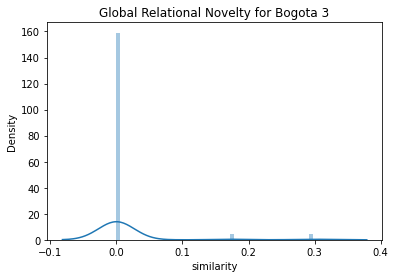

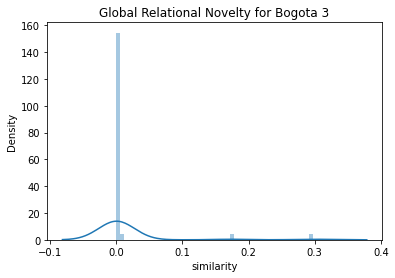

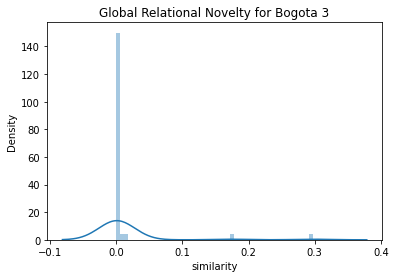

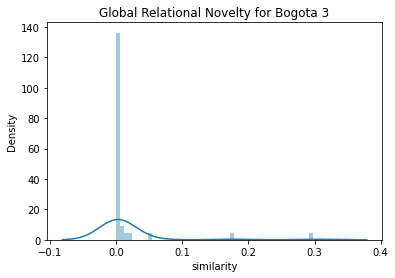

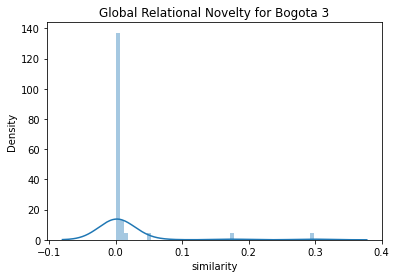

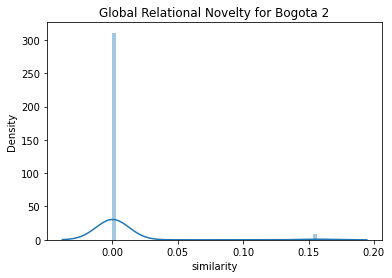

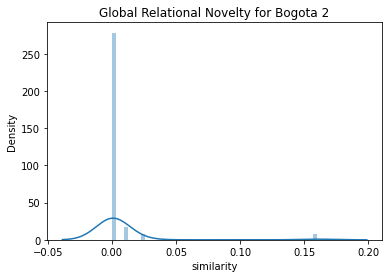

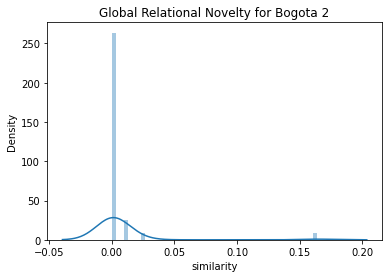

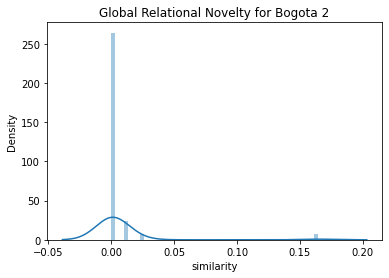

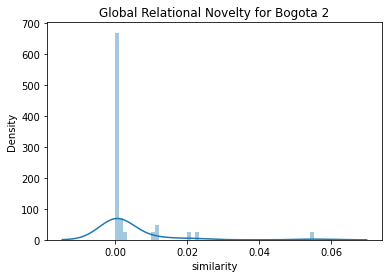

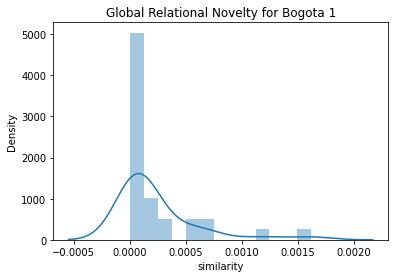

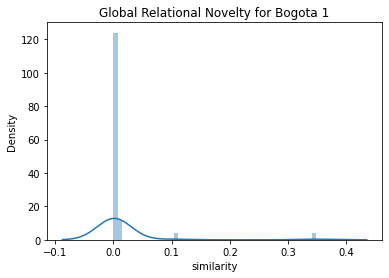

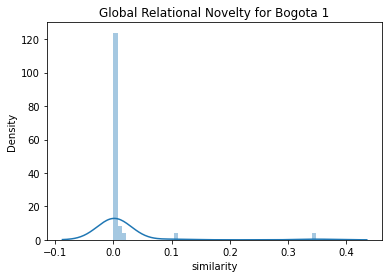

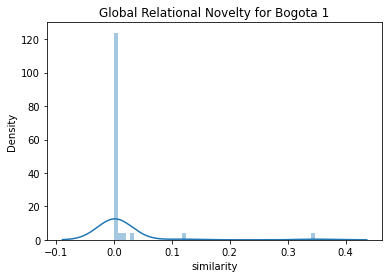

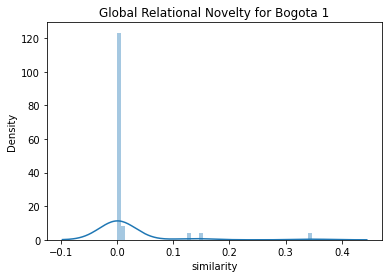

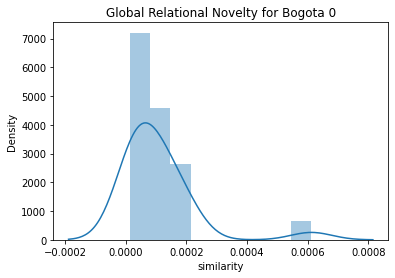

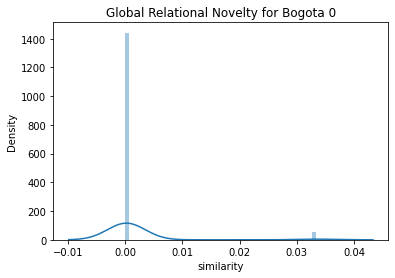

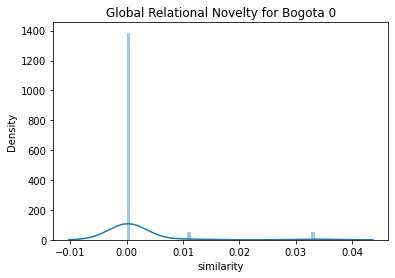

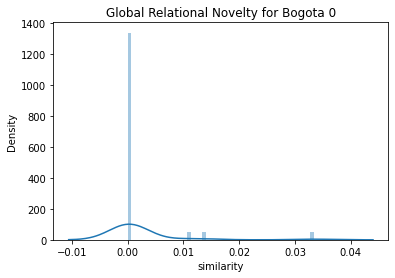

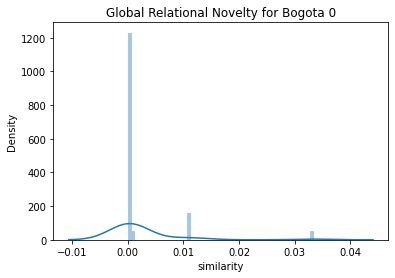

In [70]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []

for df in [subset_bogota3_phase1_all_only, subset_bogota3_phase2_all_only, subset_bogota3_phase3_all_only, subset_bogota3_phase4_all_only, subset_bogota3_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota3.append(max_value)
    median_log_bogota3.append(median_value)
    mean_log_bogota3.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 3")
    sns.distplot(np.log(df['similarity']+1))

for df in [subset_bogota2_phase1_all_only, subset_bogota2_phase2_all_only, subset_bogota2_phase3_all_only, subset_bogota2_phase4_all_only, subset_bogota2_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota2.append(max_value)
    median_log_bogota2.append(median_value)
    mean_log_bogota2.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 2")
    sns.distplot(np.log(df['similarity']+1))
    
for df in [subset_bogota1_phase1_all_only, subset_bogota1_phase2_all_only, subset_bogota1_phase3_all_only, subset_bogota1_phase4_all_only, subset_bogota1_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota1.append(max_value)
    median_log_bogota1.append(median_value)
    mean_log_bogota1.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 1")
    sns.distplot(np.log(df['similarity']+1))

for df in [subset_bogota0_phase1_all_only, subset_bogota0_phase2_all_only, subset_bogota0_phase3_all_only, subset_bogota0_phase4_all_only, subset_bogota0_phase5_all_only]:
    median_value = (np.log(df['similarity']+1)).median()
    mean_value = (np.log(df['similarity']+1)).mean()
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota0.append(max_value)
    median_log_bogota0.append(median_value)
    mean_log_bogota0.append(mean_value)
    plt.figure()
    plt.title("Global Relational Novelty for Bogota 0")
    sns.distplot(np.log(df['similarity']+1))

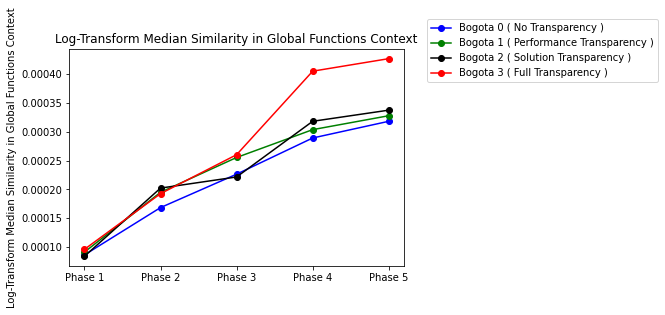

In [67]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Median Similarity in Global Functions Context")
plt.ylabel("Log-Transform Median Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

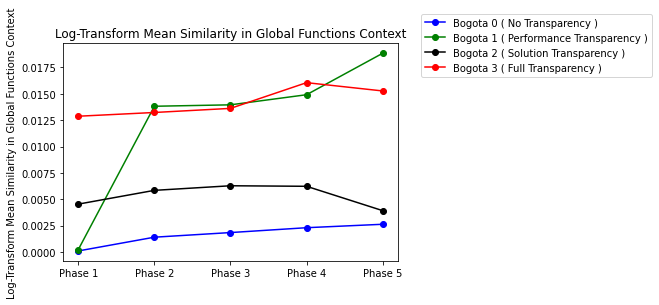

In [68]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Mean Similarity in Global Functions Context")
plt.ylabel("Log-Transform Mean Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

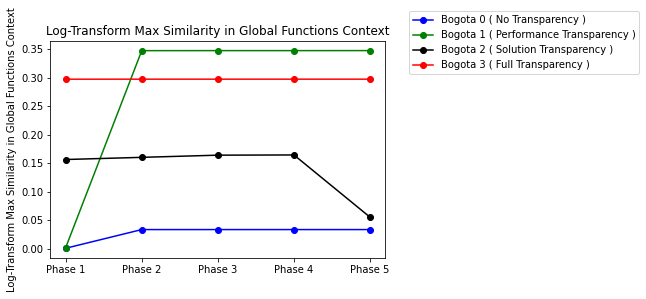

In [72]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = max_log_bogota0
y2 = max_log_bogota1
y3 = max_log_bogota2
y4 = max_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Max Similarity in Global Functions Context")
plt.ylabel("Log-Transform Max Similarity in Global Functions Context")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [69]:
%store overall_phase1
%store overall_phase2
%store overall_phase3
%store overall_phase4
%store overall_phase5
%store df_all
%store subset_bogota0_phase1
%store subset_bogota0_phase2
%store subset_bogota0_phase3
%store subset_bogota0_phase4
%store subset_bogota0_phase5
%store subset_bogota1_phase1
%store subset_bogota1_phase2
%store subset_bogota1_phase3
%store subset_bogota1_phase4
%store subset_bogota1_phase5
%store subset_bogota2_phase1
%store subset_bogota2_phase2
%store subset_bogota2_phase3
%store subset_bogota2_phase4
%store subset_bogota2_phase5
%store subset_bogota3_phase1
%store overall_phase2_bogota3
%store overall_phase3_bogota3
%store overall_phase4_bogota3
%store overall_phase5_bogota3

Stored 'overall_phase1' (DataFrame)
Stored 'overall_phase2' (DataFrame)
Stored 'overall_phase3' (DataFrame)
Stored 'overall_phase4' (DataFrame)
Stored 'overall_phase5' (DataFrame)


UsageError: Unknown variable 'df_all'
